In [1]:
# Importing the necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [76]:
# Step 1: Read the dataset file
data = pd.read_csv("wdbc.dataset")

# Step 2: Drop the sample ID (unnecessary) column
data = data.drop(columns=['x1'])

# Step 3: Map the Dignosis Classes (M, B) to Classes (1, 0)
col2map = {"M":1, "B": 0}
data = data.replace({"x2": col2map})

# Step 4: Split the dataset into Training, Validation and Testing Datasets
traindata, testdata = train_test_split(data, train_size=0.8, shuffle=False)
validationdata, testdata = train_test_split(testdata, train_size=0.5, shuffle=False)

# Step 5: Normalize all the datasets as per the Normalizing parameters calculated over Training Dataset (using sklearn library)
train_col = traindata[traindata.columns[1:32]]
train_Y = traindata[traindata.columns[0:1]].T
std_scale = preprocessing.StandardScaler().fit(train_col)
train_norm = std_scale.transform(train_col)

train_norm_X = pd.DataFrame(train_norm, index=train_col.index, columns=train_col.columns).T

test_col = testdata[testdata.columns[1:32]]
test_Y = testdata[testdata.columns[0:1]].T
test_norm = std_scale.transform(test_col)
test_norm_X = pd.DataFrame(test_norm, index=test_col.index, columns=test_col.columns).T

val_col = validationdata[validationdata.columns[1:32]]
val_Y = validationdata[validationdata.columns[0:1]].T
val_norm = std_scale.transform(val_col)
val_norm_X = pd.DataFrame(val_norm, index=val_col.index, columns=val_col.columns).T

c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log
c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
c:\users\harshali\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in multiply


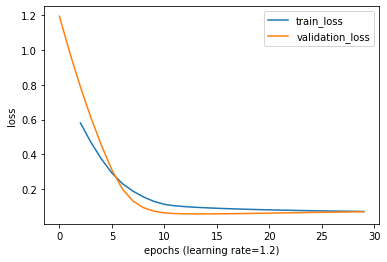

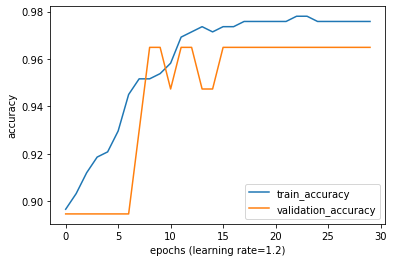

In [114]:
# Step 6: Train the model and evaluate the loss over Validation dataset by comparing with loss over Training dataset 

def sigmoid(z):
    return 1/(1+np.exp(-z))

weights = np.ones([train_norm_X.shape[0], 1])
epochs = 30
learning_rate = 1.2
b = 0
m = train_norm_X.shape[1]
m_v = val_norm_X.shape[1]
train_loss = []
validation_loss = []
accuracy_train = []
accuracy_v= []
precision_train = []
precision_v = []

for ep in range(epochs):
    z = np.dot(weights.T, train_norm_X) + b
    p = sigmoid(z)
    cost = -(np.multiply(np.log(p), train_Y) + np.multiply((1 - train_Y), np.log(1 - p))).sum(axis=1)[0]/m
    train_loss.append(np.squeeze(cost))
    
    z_v = z = np.dot(weights.T, val_norm_X) + b
    p_v = sigmoid(z_v)
    cost_v = -(np.multiply(np.log(p_v), val_Y) + np.multiply((1 - val_Y), np.log(1 - p_v))).sum(axis=1)[0]/m_v
    validation_loss.append(np.squeeze(cost_v))
    
    tacc = accuracy_score(train_Y.T, p.T.round())
    vacc = accuracy_score(val_Y.T, p_v.T.round())
    accuracy_train.append(tacc)
    accuracy_v.append(vacc)
    
    dz = p-train_Y
    dw = (1 / m) * np.dot(train_norm_X, dz.T)
    db = (1 / m) * (dz.sum(axis=1)[0])
    weights = weights - learning_rate * dw 
    b = b - learning_rate * db
fig = plt.figure()
plt.plot(range(len(train_loss)), train_loss, label='train_loss')
plt.plot(range(len(validation_loss)), validation_loss, label='validation_loss')
plt.legend()
plt.ylabel('loss')
plt.xlabel('epochs (learning rate=' + str(learning_rate) + ')')
plt.show()
fig.savefig('loss vs epochs' + str(learning_rate) + '.jpg')

fig = plt.figure()
plt.plot(accuracy_train, label='train_accuracy')
plt.plot(accuracy_v, label='validation_accuracy')
plt.legend()
plt.ylabel('accuracy')
plt.xlabel('epochs (learning rate=' + str(learning_rate) + ')')
plt.show()
fig.savefig('accuracy vs epochs' + str(learning_rate) + '.jpg')


In [115]:
# Step 7: Evaluate final trained model over Test dataset by calculating Accuracy, Precision and Recall
m_test = test_norm_X.shape[1]
z_test = np.dot(weights.T, test_norm_X) + b
p_test = sigmoid(z_test)

testacc = accuracy_score(test_Y.T, p_test.T.round())*100
testprec = precision_score(test_Y.T, p_test.T.round())*100
testrecall = recall_score(test_Y.T, p_test.T.round())*100
print("Accuracy: " + str(testacc) + " %")
print("Precision: " + str(testprec) + " %")
print("Recall: " + str(testrecall) + " %")

Accuracy: 92.98245614035088 %
Precision: 81.25 %
Recall: 92.85714285714286 %
